In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configuration des graphiques
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_style('whitegrid')

# Support de l'arabe dans les graphiques
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

print("Bibliothèques chargées avec succès ✓")

Bibliothèques chargées avec succès ✓


## 1. Chargement des données AFND

In [7]:
# Charger les données AFND équilibrées
data_path = '../data/processed/afnd_balanced.csv'
df = pd.read_csv(data_path)

print(f"Nombre d'échantillons: {len(df)}")
print(f"Nombre de colonnes: {len(df.columns)}")
print(f"\nColonnes disponibles: {df.columns.tolist()}")
print("\nPremières 5 lignes:")
df.head()

Nombre d'échantillons: 7074
Nombre de colonnes: 6

Colonnes disponibles: ['source', 'title', 'text', 'date', 'source_credibility', 'label']

Premières 5 lignes:


,source,title,text,date,source_credibility,label
0,source_10,حشد إسرائيلي على حدود غزة.. وحماس تطلق طائرة ا...,مع دخول العنف يومه الخامس، بين غزة وإسرائيل، و...,NaN,not credible,1.0
1,source_100,نادي الأسير: الأسير ماهرأبو ريان يُعلق إضرابه ...,رابط مختصر:\n\nرام الله - دنيا الوطن\n\nعلّق ا...,NaN,credible,0.0
2,source_10,الخرطوم: توليد الكهرباء سيتأثر بسبب سد النهضة,قال وزير الطاقة السوداني جادين علي عبيد، اليوم...,NaN,not credible,1.0
3,source_10,اليمن.. الجيش يطلق عملية عسكرية في حجة ويحرر 1...,أطلقت قوات الجيش اليمني، الجمعة، عملية عسكرية ...,NaN,not credible,1.0
4,source_10,نسبة المشاركة بالانتخابات 48.8% بحسب إيران و10...,أكدت مصادر في المعارضة الإيرانية أن نسبة المشا...,NaN,not credible,1.0


## 2. Informations générales sur les données

In [8]:
# Informations sur le dataset
print("Informations du dataset:")
df.info()

print("\nValeurs manquantes:")
print(df.isnull().sum())

print("\nStatistiques descriptives:")
df.describe()

Informations du dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7074 entries, 0 to 7073
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   source              7074 non-null   object 
 1   title               7074 non-null   object 
 2   text                7074 non-null   object 
 3   date                0 non-null      float64
 4   source_credibility  7074 non-null   object 
 5   label               7074 non-null   float64
dtypes: float64(2), object(4)
memory usage: 331.7+ KB

Valeurs manquantes:
source                   0
title                    0
text                     0
date                  7074
source_credibility       0
label                    0
dtype: int64

Statistiques descriptives:


,date,label
count,0.0,7074.000000
mean,NaN,0.500000
std,NaN,0.500035
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,0.500000
75%,NaN,1.000000
max,NaN,1.000000


## 3. Distribution des labels (Fiable vs Trompeur)

Distribution des labels:
label
1.0    3537
0.0    3537
Name: count, dtype: int64

Ratio d'équilibre: 100.00%


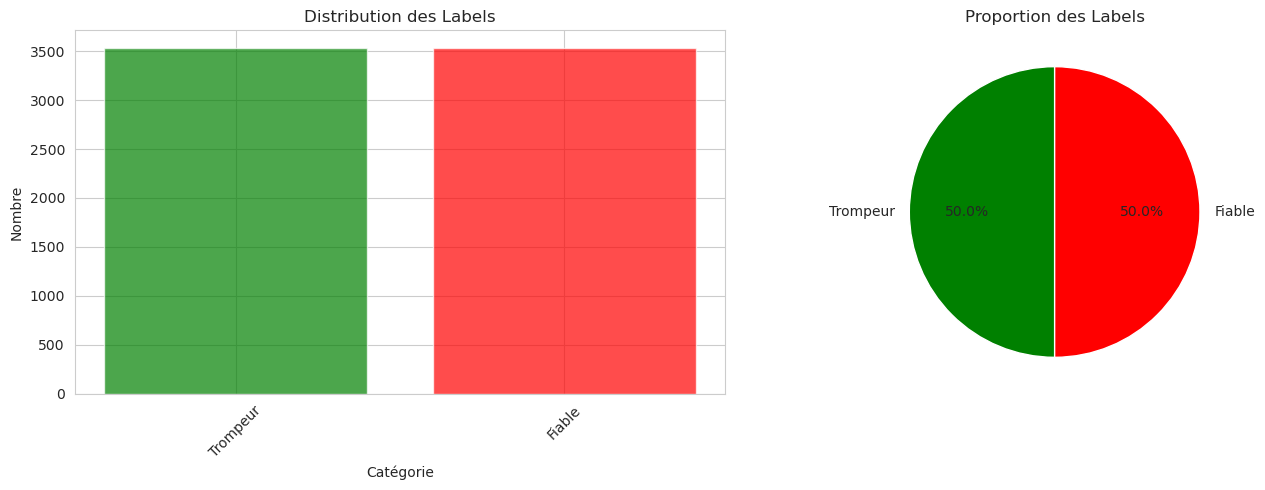

In [9]:
# Distribution des labels
label_counts = df['label'].value_counts()
print("Distribution des labels:")
print(label_counts)
print(f"\nRatio d'équilibre: {label_counts.min() / label_counts.max():.2%}")

# Graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Graphique en barres
label_names = {0: 'Fiable', 1: 'Trompeur'}
counts = df['label'].map(label_names).value_counts()
ax1.bar(counts.index, counts.values, color=['green', 'red'], alpha=0.7)
ax1.set_xlabel('Catégorie')
ax1.set_ylabel('Nombre')
ax1.set_title('Distribution des Labels')
ax1.tick_params(axis='x', rotation=45)

# Graphique circulaire (sans alpha pour compatibilité)
ax2.pie(counts.values, labels=counts.index, autopct='%1.1f%%', 
        colors=['green', 'red'], startangle=90)
ax2.set_title('Proportion des Labels')

plt.tight_layout()
plt.show()

## 4. Analyse de la longueur des textes

In [10]:
# Calcul des longueurs de texte
df['text_length'] = df['text'].str.len()
df['word_count'] = df['text'].str.split().str.len()

print("Statistiques longueur texte (caractères):")
print(df.groupby('label')['text_length'].describe())

print("\nStatistiques nombre de mots:")
print(df.groupby('label')['word_count'].describe())

Statistiques longueur texte (caractères):
        count         mean          std   min     25%     50%     75%      max
label                                                                         
0.0    3537.0  1739.889454  1583.836271  42.0   711.0  1259.0  2226.0  18785.0
1.0    3537.0  1863.634436  1057.524423  45.0  1346.0  1781.0  2260.0  11088.0

Statistiques nombre de mots:
        count        mean         std  min    25%    50%    75%     max
label                                                                  
0.0    3537.0  282.942607  258.935012  7.0  115.0  204.0  358.0  3074.0
1.0    3537.0  304.327113  172.670393  8.0  219.0  291.0  371.0  1804.0


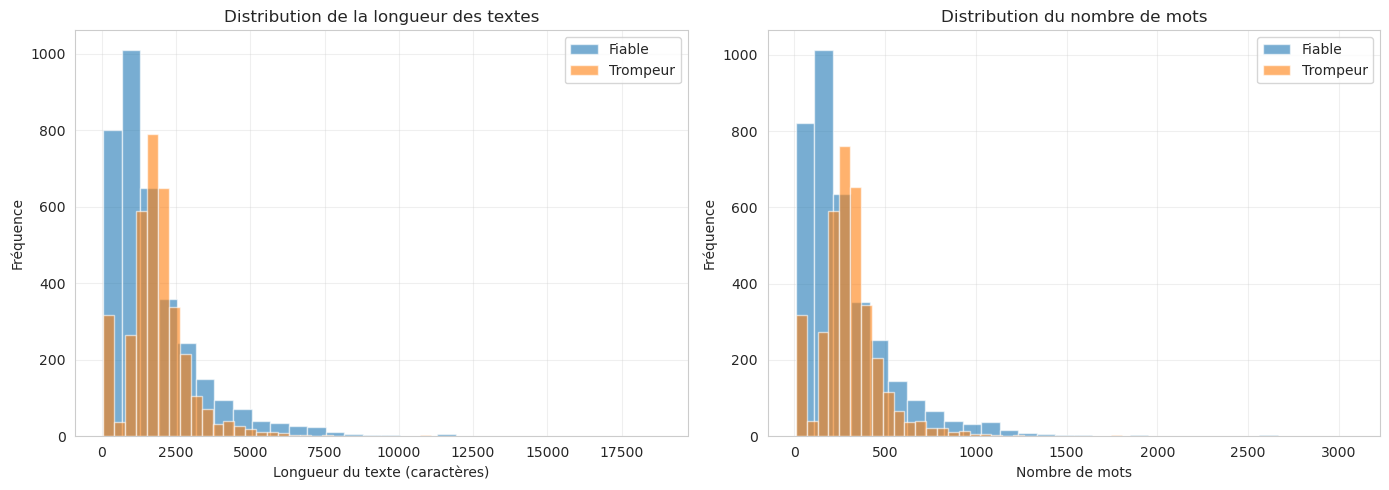

In [11]:
# Distribution des longueurs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Distribution longueur texte
for label in [0, 1]:
    data = df[df['label'] == label]['text_length']
    ax1.hist(data, bins=30, alpha=0.6, label=label_names[label])

ax1.set_xlabel('Longueur du texte (caractères)')
ax1.set_ylabel('Fréquence')
ax1.set_title('Distribution de la longueur des textes')
ax1.legend()
ax1.grid(alpha=0.3)

# Distribution nombre de mots
for label in [0, 1]:
    data = df[df['label'] == label]['word_count']
    ax2.hist(data, bins=30, alpha=0.6, label=label_names[label])

ax2.set_xlabel('Nombre de mots')
ax2.set_ylabel('Fréquence')
ax2.set_title('Distribution du nombre de mots')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Exploration des mots fréquents

In [12]:
from collections import Counter
import re

def get_top_words(texts, n=20):
    """Extraire les mots les plus fréquents"""
    all_words = []
    for text in texts:
        if pd.notna(text):
            words = re.findall(r'\w+', str(text))
            all_words.extend(words)
    
    counter = Counter(all_words)
    return counter.most_common(n)

# Mots fréquents dans les articles fiables
reliable_texts = df[df['label'] == 0]['text']
top_reliable = get_top_words(reliable_texts, 15)

print("Top 15 mots dans les articles fiables:")
for word, count in top_reliable:
    print(f"{word}: {count}")

Top 15 mots dans les articles fiables:
في: 33113
من: 25409
على: 16826
أن: 9901
إلى: 9706
ا: 7332
التي: 6385
عن: 5361
مع: 4962
قطر: 4436
خلال: 4062
ما: 3150
الذي: 2869
هذا: 2814
هذه: 2741


In [13]:
# Mots fréquents dans les articles trompeurs
fake_texts = df[df['label'] == 1]['text']
top_fake = get_top_words(fake_texts, 15)

print("Top 15 mots dans les articles trompeurs:")
for word, count in top_fake:
    print(f"{word}: {count}")

Top 15 mots dans les articles trompeurs:
في: 38652
من: 25028
على: 17110
أن: 16054
إلى: 13281
عن: 6055
التي: 5685
مع: 5438
كما: 4036
ما: 3948
بعد: 3285
بين: 3248
الذي: 3150
إيران: 2983
إن: 2967


## 6. Exemples d'articles du dataset AFND

In [14]:
print("Exemples d'articles FIABLES:\n")
for i, row in enumerate(df[df['label'] == 0].head(3).itertuples(), 1):
    print(f"{i}. Source: {getattr(row, 'source', 'N/A')}")
    print(f"   Texte: {row.text[:200]}...")
    print()

Exemples d'articles FIABLES:

1. Source: source_100
   Texte: رابط مختصر:

رام الله - دنيا الوطن

علّق الأسير ماهر أبو ريان (43 عامًا) من الخليل، إضرابه عن الطعام، الذي شرع به قبل عدة أيام احتجاجًا على مماطلة إدارة سجون الاحتلال في توفير العلاج له.



وأوضح نادي...

2. Source: source_100
   Texte: رابط مختصر:

رام الله - دنيا الوطن

رحبت دولة فلسطين بإعلان المدعية العامة للمحكمة الجنائية الدولية فاتو بنسودا، بدء مكتبها بإجراء تحقيق يتعلق بالوضع في فلسطين.



وقالت وزارة الخارجية والمغتربين في ب...

3. Source: source_100
   Texte: سجل الأردن اليوم الاثنين، ارتفاعاً كبيراً بعدد الإصابات اليومية لفيروس (كورونا) المستجد، (كوفيد-19).



يأتي ذلك بعدما أعلنت وزارة الصحة في البلاد، تسجيل 4550 حالة إصابة جديدة بالفيروس، خلال 24 ساعة ا...



In [15]:
print("Exemples d'articles TROMPEURS:\n")
for i, row in enumerate(df[df['label'] == 1].head(3).itertuples(), 1):
    print(f"{i}. Source: {getattr(row, 'source', 'N/A')}")
    print(f"   Texte: {row.text[:200]}...")
    print()

Exemples d'articles TROMPEURS:

1. Source: source_10
   Texte: مع دخول العنف يومه الخامس، بين غزة وإسرائيل، وارتفاع عدد القتلى الفلسطينيين إلى 122 قتيلاً و900 جريح، أكد مراسل العربية/ الحدث الجمعة أن إسرائيل أرسلت مزيداً من التعزيزات العسكرية للشريط الحدودي مع ال...

2. Source: source_10
   Texte: قال وزير الطاقة السوداني جادين علي عبيد، اليوم السبت، إن عدم التوصل لاتفاق بشأن تعبئة وتشغيل سد النهضة أثر على توليد الكهرباء في مناطق مختلفة بالسودان.

موضوع يهمك دخلت المناوشات بين الاتحاد الأوروبي ...

3. Source: source_10
   Texte: أطلقت قوات الجيش اليمني، الجمعة، عملية عسكرية مفاجئة ضد ميليشيات الحوثي الانقلابية في محافظة حجة، شمال غربي البلاد، حررت خلالها عدداً من المناطق. وتمكنت قوات الجيش اليمني، في المنطقة العسكرية الخامسة،...



## 7. Analyse des sources AFND

Explorons la distribution par source dans le dataset AFND.

## 8. Résumé et Conclusions

**Observations du dataset AFND:**
- Distribution des labels (fiable vs trompeur)
- Différences de longueur entre les catégories
- Mots fréquents par catégorie
- Diversité des sources

**Prochaines étapes:**
1. Prétraitement des textes arabes
2. Extraction de features (TF-IDF)
3. Entraînement des modèles (NB, SVM, RF)
4. Évaluation et comparaison

Distribution par source:
source
source_10     3537
source_100    1322
source_102    1115
source_101     852
source_1       248
Name: count, dtype: int64


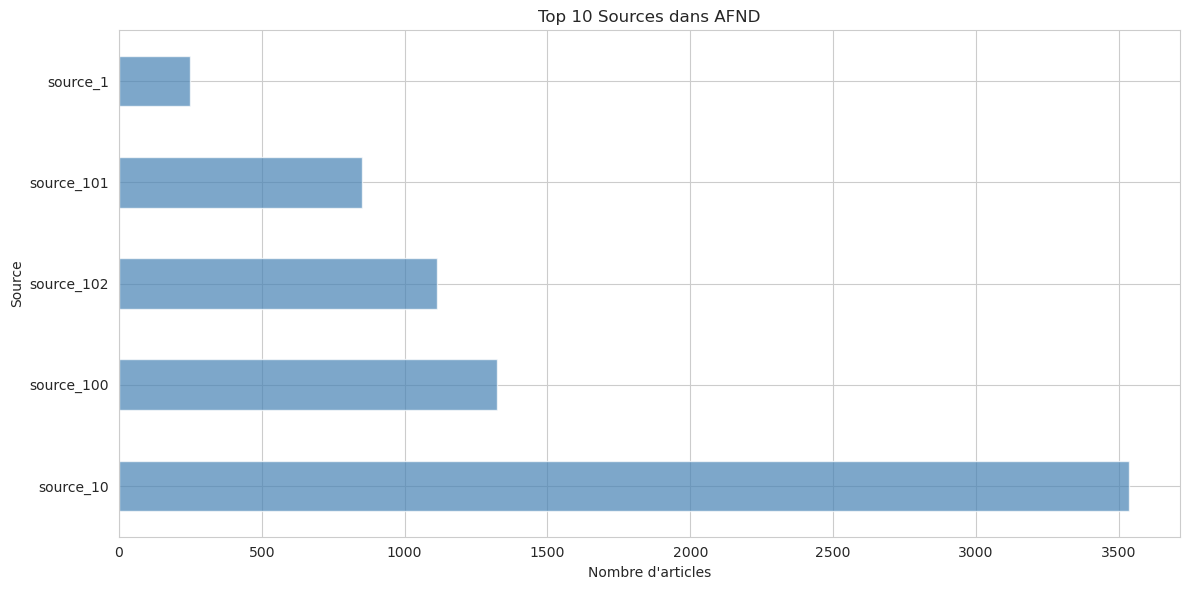


Distribution labels par source (top 10):
label        0.0   1.0
source                
source_1     248     0
source_10      0  3537
source_100  1322     0
source_101   852     0
source_102  1115     0


In [16]:
# Analyse des sources
if 'source' in df.columns:
    print("Distribution par source:")
    source_counts = df['source'].value_counts().head(10)
    print(source_counts)
    
    # Graphique
    plt.figure(figsize=(12, 6))
    source_counts.plot(kind='barh', color='steelblue', alpha=0.7)
    plt.xlabel('Nombre d\'articles')
    plt.ylabel('Source')
    plt.title('Top 10 Sources dans AFND')
    plt.tight_layout()
    plt.show()
    
    # Croisement source-label
    if len(df['source'].unique()) > 1:
        print("\nDistribution labels par source (top 10):")
        top_sources = df['source'].value_counts().head(10).index
        cross_tab = pd.crosstab(df[df['source'].isin(top_sources)]['source'], 
                                df[df['source'].isin(top_sources)]['label'])
        print(cross_tab)
else:
    print("Colonne 'source' non disponible dans ce dataset")